# Matrix Math

## Inner Product and Outer Product
Youtube tutorial:
https://www.youtube.com/watch?v=FCmH4MqbFGs

Matrix algebra in python cheatsheet:
https://www.tutorialspoint.com/matrix-manipulation-in-python

### Inner Product
Inner product is the same as dot product.


For matrices:  

$X = \begin{bmatrix}
    x_{1} \\
    x_{2} \\
    x_{3} 
\end{bmatrix}
\quad \textrm{and} \quad Y = 
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} 
\end{bmatrix}$

The inner product is:  

$
X^{T} Y = 
\begin{bmatrix}
    x_{1} & x_{2} & x_{3} 
\end{bmatrix}
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} 
\end{bmatrix}  
= x_{1} y_{1} + x_{2} y_{2} + x_{3} y_{3}
$

In [43]:
import numpy as np
u = np.array([[1, 3, 2]])
v = np.array([[2, 4, 6]])
print("u = ")
print(u)
print("v = ")
print(v)

u = 
[[1 3 2]]
v = 
[[2 4 6]]


Inner product is $u^{T}v$

In [44]:
print("u.T = ", u.T)
print("v = ")
print(v)
iProd = np.multiply(u, v.T)
print("iProd =")
print(iProd)


u.T =  [[1]
 [3]
 [2]]
v = 
[[2 4 6]]
iProd =
[[ 2  6  4]
 [ 4 12  8]
 [ 6 18 12]]


Turns out numpy mupltiply does an element-wise multiply. `np.dot()` can be used to do a dot product of arrays with the same dimensions.
For other workarounds, see https://stackoverflow.com/questions/21562986/numpy-matrix-vector-multiplication

### Outer Product

For matrices:  

$X = \begin{bmatrix}
    x_{1} \\
    x_{2} \\
    x_{3} 
\end{bmatrix}
\quad \textrm{and} \quad Y = 
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} 
\end{bmatrix}$

The outer product is:  

$
X Y^{T} = 
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} 
\end{bmatrix}  
\begin{bmatrix}
    x_{1} & x_{2} & x_{3} 
\end{bmatrix}
= 
\begin{bmatrix}
    x_{1} y_{1}  &  x_{1} y_{2}  &  x_{1} y_{3} \\
    x_{2} y_{1}  &  x_{2} y_{2}  &  x_{2} y_{3} \\
    x_{3} y_{1}  &  x_{3} y_{2}  &  x_{3} y_{3}
\end{bmatrix}
$


## Hermitian (Conjugate Transpose)

The Hermitian function is equivalent to the conjugate transpose of a matrix.

Taking the complex conjugate of a matrix means simply flipping the sign of any complex parts.

$X = 
\begin{bmatrix}
    1 & 2 - 3i \\
    5 & 7 + 2i
\end{bmatrix} \quad\quad
\bar{X} = 
\begin{bmatrix}
    1 & 2 + 3i \\
    5 & 7 - 2i
\end{bmatrix}
$

So the Conjugate Transpose (Hermitian transform) would be:

$X^{H} = \bar{X^{T}} = 
\begin{bmatrix}
    1      & 5 \\
    2 + 3i & 7 - 2i \\
\end{bmatrix}
$

## Covariance Matrix

https://datascienceplus.com/understanding-the-covariance-matrix/

Covariance is the degree to which two variables are linked.
For a set of data x (e.g. height in a population) and a set of data y (e.g. weight in a population) the covariance is the average of (each x sample minus the average of x's, times each y sample minus the average of y's). 

The Covariance Matrix between variables a, b, and c relates each variable as follows:

$C = C\bar {C^{T}} = 
\begin{bmatrix}
    σ(a,a)  &  σ(a,b)  &  σ(a,c) \\
    σ(b,a)  &  σ(b,b)  &  σ(b,c) \\
    σ(c,a)  &  σ(c,b)  &  σ(c,c)
\end{bmatrix}$

It can be computed by multiplying a matrix by its complex conjugate transpose.

To demonstrate, generate random points with mean values $\bar{x}, \bar{y}$ at the origin and unit variance $σ^{2}(x) = σ^{2}(y) = 1$ which is also called white noise and has the identity matrix as the covariance matrix:

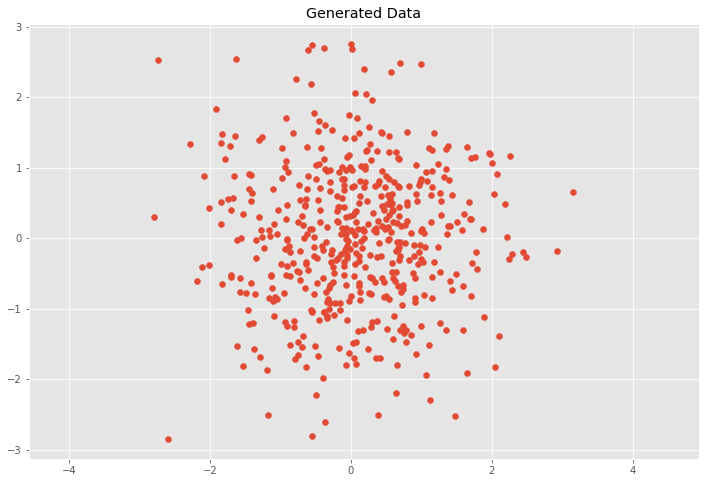

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');

This case would mean that x and y are independent (or uncorrelated) and the covariance matrix C is  
$C=
\begin{bmatrix}
    σ^{2}_x  & 0 \\
    0 & σ^{2}_y
\end{bmatrix}
$

We can check this by calculating the covariance matrix

In [47]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[0.95066424, 0.00985021],
       [0.00985021, 1.01507252]])

Which approximatelly gives us our expected covariance matrix with variances $σ^{2}_x = σ^{2}_y = 1$.

## Conjugates
Conjugate of a complex number is its reflection about the real plane
e.g the conjugate of $5-3i$ is $5 + 3i$. 

The conjugate of a matrix is taken by simply taking the conjugate of each element of the matrix.

If you conjugate a matrix and transpose it, you have taken the the Hermitian transpose of it. A matrix that is equal to its Hermition transpose is said to be Hermitian. This is a property of covariance matrices


## Least Squares

The Least Squares problem is the problem of finding a best fit solution to an overconstrained system of equations.
For example, if you have a number of points and want to find a best fit line for them. 

We want to solve for $β$.

$Xβ = Y$

We can't just multiply by X's inverse because it has no inverse, since it has more points than dimensions and is not square. 

$β = X^{-1}Y$

Instead we try to minimize the error. Error function is given by:

$\sum (Y-\hat{Y})^{2} = \sum (Y - X\hat{β})^{2}$

Where the hats denote something that the [source](https://towardsdatascience.com/qr-matrix-factorization-15bae43a6b2) didn't explain.


## Vector projection

The projection of vector $u$ onto vector $v$ is:

$proj(v u) = \dfrac{(u \cdot v) v}{v \cdot v}$

### Explanation
The magnitude of the projection of $u$ onto $v$ is:  

$||u|| cos(θ)$  
where θ is the angle between the vectors.

The direction of the projection is the direction of $v$, which is:  

$\dfrac{v}{||v||}$

The dot prouct gives:  

$u \cdot v = ||u|| ||v|| cos(θ)$

Explanation and proof here (12.3.7)
https://math.libretexts.org/Bookshelves/Calculus/Book%3A_Calculus_(OpenStax)/12%3A_Vectors_in_Space/12.3%3A_The_Dot_Product


From the dot product equation we can get the magnitude of the projection:  

$\dfrac{u \cdot v}{||v||} = ||u|| cos(θ)$  

Multiplying that by the direction of the projection gives us the actual projection:  

$proj(v u) = \dfrac{u \cdot v}{||v||} * \dfrac{v}{||v||} = \dfrac{(u \cdot v) v}{v \cdot v}$

## Gram-Schmidt Method 

A method for finding an orthonormal basis for a set of vectors. 

A **basis** is a set of vectors that spans the given set of vectors. This really just means that you need a vector in the basis that has a component in every dimension that's represented in the original set of vectors.

An **orthogonal basis** is a basis in which all the vectors in the basis are orthogonal. Simple enough. They could be aligned with coordinate axes, or they could be rotated in any direction. 

An **orthonormal basis** is a basis where all the vectors are orthoginal and have length 1.

First pick a vector in X. Say $x_{1} = u_{1}$.
Next find a vector orthogonal to $u_{1}$ by projecting the next column of X, $x_{2}$, onto it, then subtracting the projection from $x_{2}$.

$u_{2} = x_{2} - proj(u_{1} x_{2})$



## QR Decomposition

A method for solving the Least Squares problem.

The idea is to break down the $X$ matrix into matrices $QR$, where $Q$ is an orthogonal matrix and $R$ is a square upper/right triangular matrix.

The inverse of an orthogonal matrix is its transpose. And since $R$ is square, it's invertable. This means that we can find the inverse of $Q$ and $R$ and solve the Least Squares problem like so:

$\hat{β} = (QR)^{-1} Y = R^{-1} Q^{T} Y$

The way to find the QR factors of a matrix is to use the Gram-Schmidt process to first find Q. Then to find R we just multiply the original matrix by the transpose of Q.



## Cholesky Decomposition